In [3]:
import pandas as pd

# Read the file
df = pd.read_csv('D:/SIFT/SIFT_GLUT14_ave.txt', sep=' ')

# Remove all numerical values from the 'BC' column
df['BC'] = df['BC'].str.replace(r'\d+', '', regex=True)

# Drop the 'non' column
df = df.drop(columns=['non'])

# Group the DataFrame by the 'BC' column and calculate the average of 'Und' for each group
averages = df.groupby('BC')['Und'].mean().reset_index()

# Rename the columns for clarity
averages.columns = ['Letter', 'Average_Und']

# Print the results
print(averages)

# Save the DataFrame to a csv file
averages.to_csv('D:/SIFT/SIFT_GLUT14_ave_output.csv', index=False)


   Letter  Average_Und
0       A     0.158737
1       C     0.186550
2       D     0.221187
3       E     0.173980
4       F     0.106934
5       G     0.105423
6       H     0.237250
7       I     0.112348
8       K     0.188821
9       L     0.125533
10      M     0.129767
11      N     0.148825
12      P     0.108614
13      Q     0.214639
14      R     0.133405
15      S     0.167222
16      T     0.186529
17      V     0.132592
18      W     0.125000
19      Y     0.181900


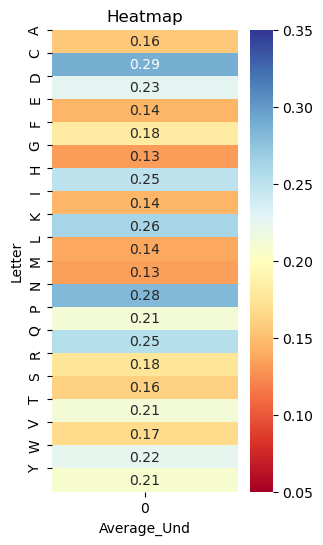

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data from the CSV file
data = pd.read_csv('D:/SIFT/SIFT_GLUT13_ave_output.csv', delimiter=',')

#data.columns = data.columns.str.strip()
#print(data.columns)
# Create the heatmap using seaborn
plt.figure(figsize=(3, 6))  # You can adjust the figure size as needed
heatmap = sns.heatmap(data['Average_Und'].values.reshape(-1, 1), cmap='RdYlBu', annot=True, fmt=".2f", vmin=0.05, vmax=0.35)

# Set labels and title
#plt.yticks(range(len(data)), data['Letter'])
plt.yticks(range(len(data)), data['Letter'])
plt.ylabel('Letter')
plt.xlabel('Average_Und')
plt.title('Heatmap')

heatmap.yaxis.tick_left()
heatmap.yaxis.set_label_coords(-0.15, 0.5)

# Save the heatmap as a .png file in the same location as the input file
input_file_path = "D:/SIFT/SIFT_GLUT13_ave_output.csv"
output_file_path = input_file_path.replace(".csv", "_heatmap.png")
plt.savefig(output_file_path)


# Show the heatmap
plt.show()

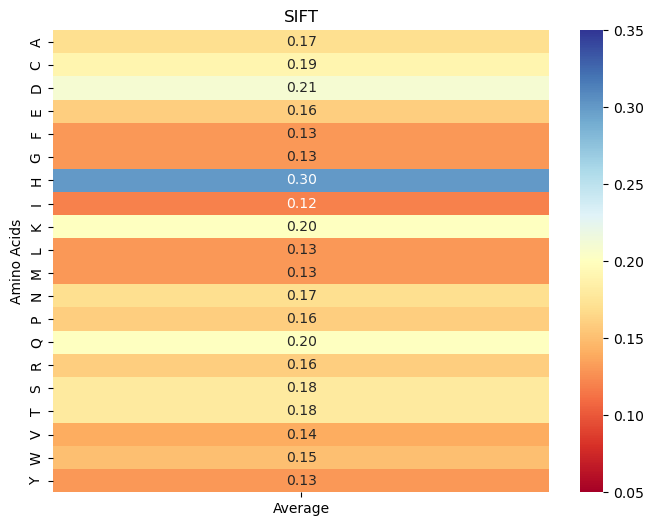

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Initialize a dictionary to store the sum and count of averages for each amino acid
amino_acid_avg_dict = {}

# Directory containing your CSV files
directory = r'C:\Users\kfc\Desktop\GLUTSIFT'

input_file_path = "D:/GLUTtransporters/patogenicities.txt"
output_directory = os.path.dirname(os.path.abspath(input_file_path))


# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Process only CSV files
        file_path = os.path.join(directory, filename)
        # Load data from the CSV file
        data = pd.read_csv(file_path, delimiter=';')
        
        # Print the first three rows of the loaded data
        #print(f"First three rows of {filename}:")
        #print(data.head(3))
        #print()  # Add a blank line for separation
        
        # Calculate the average for each amino acid in the current file
        for index, row in data.iterrows():
            amino_acid = row['Letter']
            average = row['Average_Und']
            if amino_acid in amino_acid_avg_dict:
                amino_acid_avg_dict[amino_acid].append(average)
            else:
                amino_acid_avg_dict[amino_acid] = [average]

# Calculate the average of averages for each amino acid
combined_avg_dict = {}
for amino_acid, avg_list in amino_acid_avg_dict.items():
    combined_avg_dict[amino_acid] = round(sum(avg_list) / len(avg_list), 2)

# Convert the result into a DataFrame
combined_avg_df = pd.DataFrame(list(combined_avg_dict.items()), columns=['Letter', 'Average'])

# Create a heatmap using Seaborn with annotations
plt.figure(figsize=(8, 6))
ax = sns.heatmap(combined_avg_df.pivot_table(index='Letter', values='Average'), cmap='RdYlBu', annot=True, fmt=".2f", vmin=0.05, vmax=0.35)
#plt.xlabel('Combined Average')
plt.ylabel('Amino Acids')
plt.title('SIFT')
output_file_path = os.path.join(output_directory, "SIFT_AMK_heatmap.svg")
plt.savefig(output_file_path)
# Display the heatmap
plt.show()
